### Understand the dataset

trans_date_trans_time: This column likely represents the date and time of the transaction.

cc_num: This column likely represents the credit card number used for the transaction.

merchant: This column contains the name or identifier of the merchant where the transaction took place.

category: This column likely represents the category of the transaction (e.g., groceries, entertainment, etc.).

amt: This column contains the transaction amount. 

first, last, gender, street, city, state, zip, lat, long, city_pop: These columns contain various details about the customer making the transaction, such as their name, gender, address, and location.

job, dob: These columns contain information about the customer's occupation and date of birth, respectively.

trans_num: This column likely represents a unique identifier for each transaction.

unix_time: This column likely represents the transaction time in Unix timestamp format, providing another representation of transaction time that could be useful for analysis.

merch_lat, merch_long: These columns contain latitude and longitude coordinates of the merchant location. Similar to customer location information.

is_fraud: This column is the target variable indicating whether a transaction is fraudulent (1) or not (0). This is the label trying to predict with your model.

### Import the basic dependencies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## read the Dataset 
df = pd.read_csv('fraudTrain.csv')


In [3]:
## Display all the columns 
pd.set_option('display.max_columns',None)

df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

## Preprocessing 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
##Check the numerical and object types columns
# Check numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
print('Numerical columns in the dataset:')
print(numerical_cols)

# Check object type columns
object_cols = df.select_dtypes(include=['object'])
print('Object type columns in the dataset:')
print(object_cols)

Numerical columns in the dataset:
         Unnamed: 0               cc_num     amt    zip      lat      long  \
0                 0     2703186189652095    4.97  28654  36.0788  -81.1781   
1                 1         630423337322  107.23  99160  48.8878 -118.2105   
2                 2       38859492057661  220.11  83252  42.1808 -112.2620   
3                 3     3534093764340240   45.00  59632  46.2306 -112.1138   
4                 4      375534208663984   41.96  24433  38.4207  -79.4629   
...             ...                  ...     ...    ...      ...       ...   
1296670     1296670       30263540414123   15.56  84735  37.7175 -112.4777   
1296671     1296671     6011149206456997   51.70  21790  39.2667  -77.5101   
1296672     1296672     3514865930894695  105.93  88325  32.9396 -105.8189   
1296673     1296673     2720012583106919   74.90  57756  43.3526 -102.5411   
1296674     1296674  4292902571056973207    4.30  59871  45.8433 -113.8748   

         city_pop   unix_time

In [6]:
##Check the statiscal value of the data 
df.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02   
25%   -9.679800e+01  7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01   
50%   -8.747690e+01  2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01   
75%   -8.015800e+01  2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01   
max   -6.795030e+01  2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.296675e+06  
mean   5.788652e-03  
std    7.586269e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

In [7]:
df.describe(include = 'object')

trans_date_trans_time           merchant       category        first  \
count                1296675            1296675        1296675      1296675   
unique               1274791                693             14          352   
top      2019-04-22 16:02:01  fraud_Kilback LLC  gas_transport  Christopher   
freq                       4               4403         131659        26669   

           last   gender                      street        city    state  \
count   1296675  1296675                     1296675     1296675  1296675   
unique      481        2                         983         894       51   
top       Smith        F  0069 Robin Brooks Apt. 695  Birmingham       TX   
freq      28794   709863                        3123        5617    94876   

                      job         dob                         trans_num  
count             1296675     1296675                           1296675  
unique                494         968                           1296675  
top     Film/video editor  1977-03-23  0b242abb623afc578575680df30655b9  
freq                 9779        5636                                 1

In [8]:
## check the null Values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### So no null values available in the dataset

In [9]:
## check the columns 
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [10]:
import time

In [11]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [12]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['dob'] = pd.to_datetime(df['dob'])

I noticed that the 'Dob' (date of birth) column and the 'trans_date_trans_time' column were in the object datatype, which means they were treated as strings. To work with these columns more effectively and accurately, I converted them into the date datatype.

In [13]:
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job        dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling 1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher 1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer 1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney 1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [14]:
## I will drop some columns which is not important for the prediction
df.drop(columns = ['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace =True)

Drop columns deemed unimportant for fraud prediction


In [15]:
df

merchant       category     amt gender  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97      F   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F   
2                       fraud_Lind-Buckridge  entertainment  220.11      M   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M   
4                        fraud_Keeling-Crist       misc_pos   41.96      M   
...                                      ...            ...     ...    ...   
1296670                    fraud_Reichel Inc  entertainment   15.56      M   
1296671             fraud_Abernathy and Sons    food_dining   51.70      M   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93      M   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90      M   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30      M   

             lat      long  city_pop                                job  \
0        36.0788  -81.1781      3495          Psychologist, counselling   
1        48.8878 -118.2105       149  Special educational needs teacher   
2        42.1808 -112.2620      4154        Nature conservation officer   
3        46.2306 -112.1138      1939                    Patent attorney   
4        38.4207  -79.4629        99     Dance movement psychotherapist   
...          ...       ...       ...                                ...   
1296670  37.7175 -112.4777       258                       Geoscientist   
1296671  39.2667  -77.5101       100   Production assistant, television   
1296672  32.9396 -105.8189       899                    Naval architect   
1296673  43.3526 -102.5411      1126              Volunteer coordinator   
1296674  45.8433 -113.8748       218           Therapist, horticultural   

          unix_time  merch_lat  merch_long  is_fraud  
0        1325376018  36.011293  -82.048315         0  
1        1325376044  49.159047 -118.186462         0  
2        1325376051  43.150704 -112.154481         0  
3        1325376076  47.034331 -112.561071         0  
4        1325376186  38.674999  -78.632459         0  
...             ...        ...         ...       ...  
1296670  1371816728  36.841266 -111.690765         0  
1296671  1371816739  38.906881  -78.246528         0  
1296672  1371816752  33.619513 -105.130529         0  
1296673  1371816816  42.788940 -103.241160         0  
1296674  1371816817  46.565983 -114.186110         0  

[1296675 rows x 12 columns]

### Exploratory Data Analysis

In [16]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop',
       'job', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

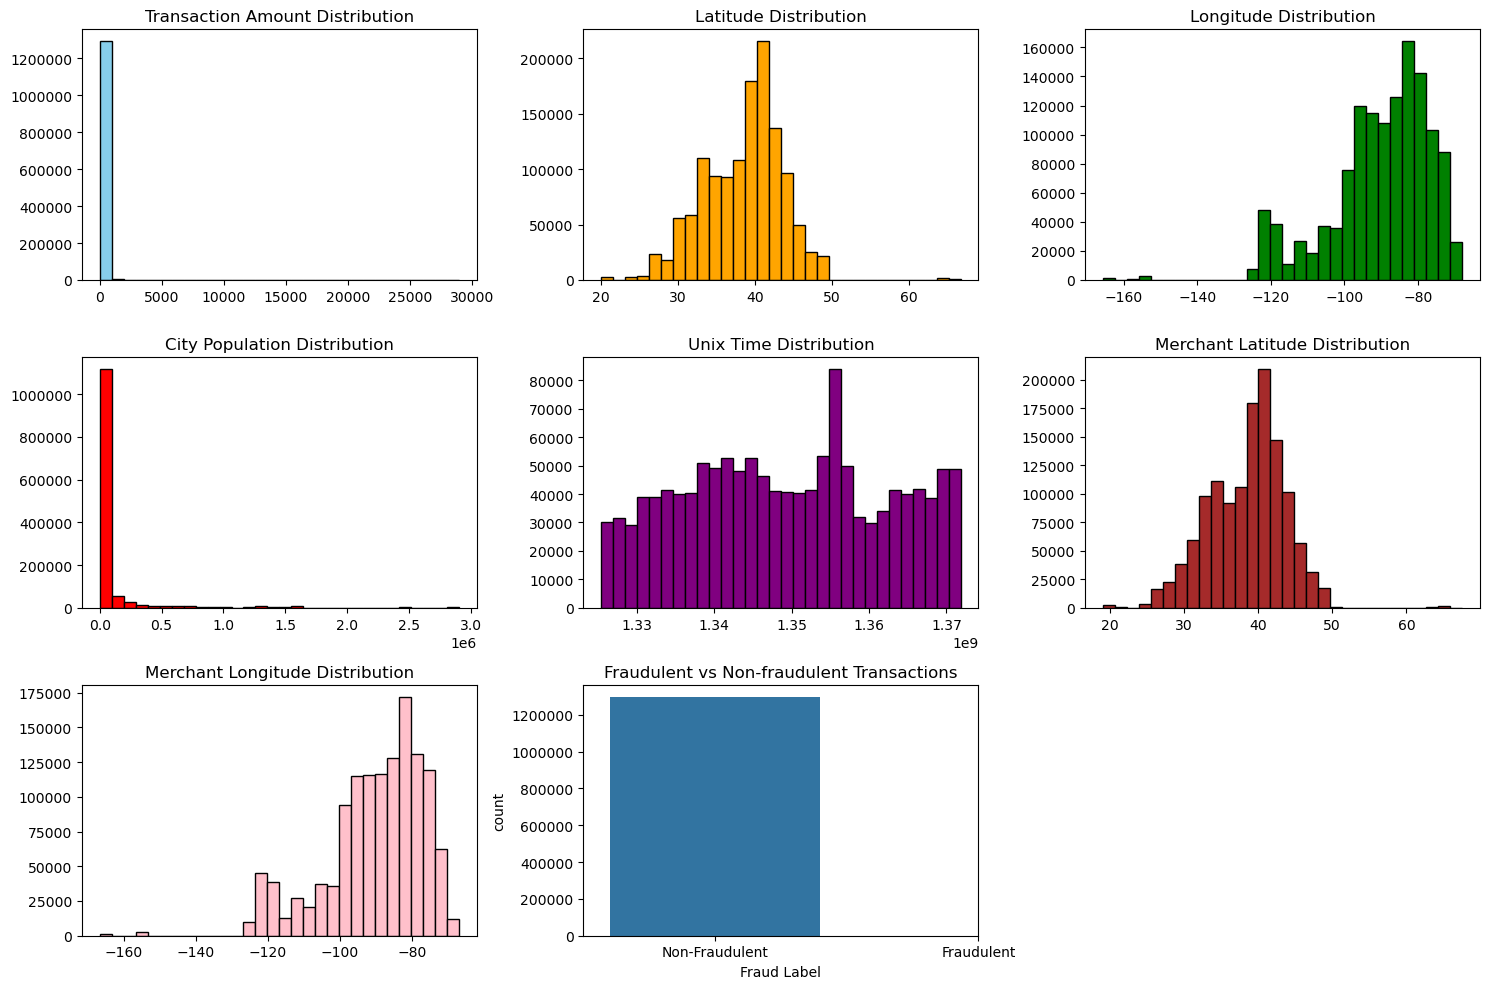

In [17]:
# Plot histograms for numerical features
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.hist(df['amt'], bins=30, color='skyblue', edgecolor='black')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Transaction Amount Distribution')

plt.subplot(3, 3, 2)
plt.hist(df['lat'], bins=30, color='orange', edgecolor='black')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Latitude Distribution')

plt.subplot(3, 3, 3)
plt.hist(df['long'], bins=30, color='green', edgecolor='black')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Longitude Distribution')

plt.subplot(3, 3, 4)
plt.hist(df['city_pop'], bins=30, color='red', edgecolor='black')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('City Population Distribution')

plt.subplot(3, 3, 5)
plt.hist(df['unix_time'], bins=30, color='purple', edgecolor='black')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Unix Time Distribution')

plt.subplot(3, 3, 6)
plt.hist(df['merch_lat'], bins=30, color='brown', edgecolor='black')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Merchant Latitude Distribution')

plt.subplot(3, 3, 7)
plt.hist(df['merch_long'], bins=30, color='pink', edgecolor='black')
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Merchant Longitude Distribution')

# Plot bar chart for the target variable is_fraud
plt.subplot(3, 3, 8)
sns.countplot(df['is_fraud'])
plt.title('Fraudulent vs Non-fraudulent Transactions')
plt.xlabel('Fraud Label')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])

# Disable scientific notation for the y-axis tick labels
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

plt.tight_layout()
plt.show()


In [18]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

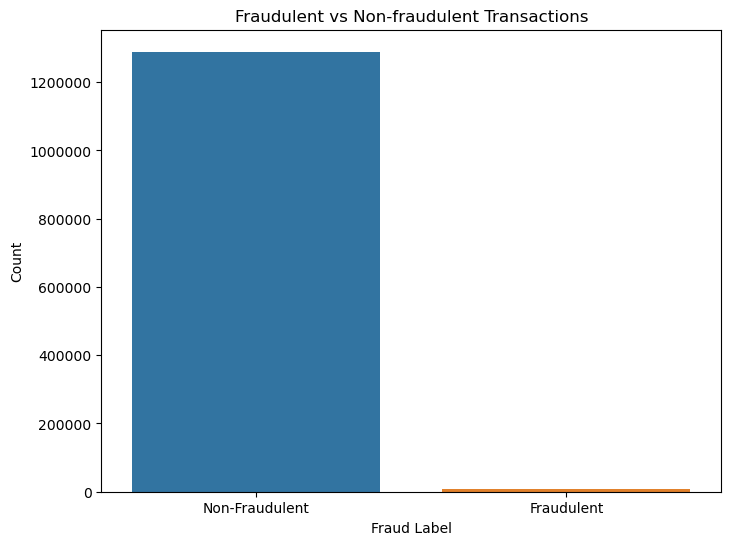

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_fraud')
plt.title('Fraudulent vs Non-fraudulent Transactions')
plt.xlabel('Fraud Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()



Text(0.5, 1.0, 'Fraudulent Transactions by Gender')

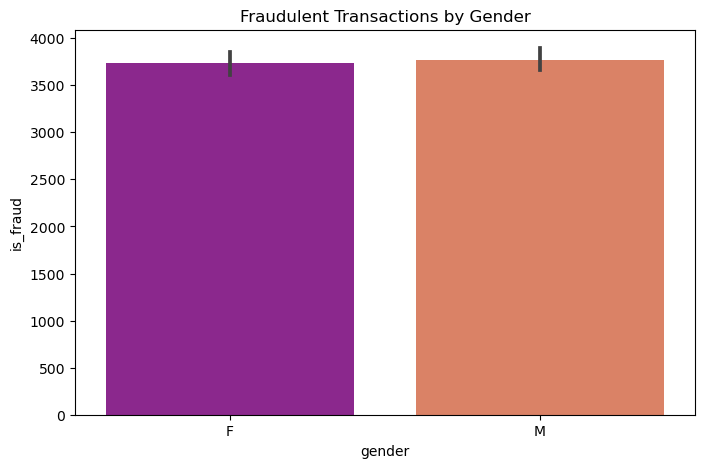

In [20]:
# let's investigate relationships between categorical feature gender and is_fraud using bar plots:
plt.figure(figsize = (8,5))
sns.barplot(data = df , x = 'gender' , y = 'is_fraud' , palette='plasma',estimator= sum)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Fraudulent Transactions by Gender')

In [21]:
##Check the numrical and object type columns after dropping the columns 
df.head()

merchant       category     amt gender      lat  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F  36.0788   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F  48.8878   
2                fraud_Lind-Buckridge  entertainment  220.11      M  42.1808   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M  46.2306   
4                 fraud_Keeling-Crist       misc_pos   41.96      M  38.4207   

       long  city_pop                                job   unix_time  \
0  -81.1781      3495          Psychologist, counselling  1325376018   
1 -118.2105       149  Special educational needs teacher  1325376044   
2 -112.2620      4154        Nature conservation officer  1325376051   
3 -112.1138      1939                    Patent attorney  1325376076   
4  -79.4629        99     Dance movement psychotherapist  1325376186   

   merch_lat  merch_long  is_fraud  
0  36.011293  -82.048315         0  
1  49.159047 -118.186462         0  
2  43.150704 -112.154481         0  
3  47.034331 -112.561071         0  
4  38.674999  -78.632459         0

In [22]:
numerical_col = df.select_dtypes(include=['int64','float64'])
print(numerical_col)

object_col = df.select_dtypes(include=['object'])
print(object_col)

            amt      lat      long  city_pop   unix_time  merch_lat  \
0          4.97  36.0788  -81.1781      3495  1325376018  36.011293   
1        107.23  48.8878 -118.2105       149  1325376044  49.159047   
2        220.11  42.1808 -112.2620      4154  1325376051  43.150704   
3         45.00  46.2306 -112.1138      1939  1325376076  47.034331   
4         41.96  38.4207  -79.4629        99  1325376186  38.674999   
...         ...      ...       ...       ...         ...        ...   
1296670   15.56  37.7175 -112.4777       258  1371816728  36.841266   
1296671   51.70  39.2667  -77.5101       100  1371816739  38.906881   
1296672  105.93  32.9396 -105.8189       899  1371816752  33.619513   
1296673   74.90  43.3526 -102.5411      1126  1371816816  42.788940   
1296674    4.30  45.8433 -113.8748       218  1371816817  46.565983   

         merch_long  is_fraud  
0        -82.048315         0  
1       -118.186462         0  
2       -112.154481         0  
3       -112.561071

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(numerical_col)

df_scaled = pd.DataFrame(scaled_data, columns=numerical_col.columns)

In [24]:
df.head()

merchant       category     amt gender      lat  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97      F  36.0788   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23      F  48.8878   
2                fraud_Lind-Buckridge  entertainment  220.11      M  42.1808   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00      M  46.2306   
4                 fraud_Keeling-Crist       misc_pos   41.96      M  38.4207   

       long  city_pop                                job   unix_time  \
0  -81.1781      3495          Psychologist, counselling  1325376018   
1 -118.2105       149  Special educational needs teacher  1325376044   
2 -112.2620      4154        Nature conservation officer  1325376051   
3 -112.1138      1939                    Patent attorney  1325376076   
4  -79.4629        99     Dance movement psychotherapist  1325376186   

   merch_lat  merch_long  is_fraud  
0  36.011293  -82.048315         0  
1  49.159047 -118.186462         0  
2  43.150704 -112.154481         0  
3  47.034331 -112.561071         0  
4  38.674999  -78.632459         0

### Feature Engineering

In [25]:
## encode the object type to numerical type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
    


In [26]:
df.head()

merchant  category     amt  gender      lat      long  city_pop  job  \
0       514         8    4.97       0  36.0788  -81.1781      3495  370   
1       241         4  107.23       0  48.8878 -118.2105       149  428   
2       390         0  220.11       1  42.1808 -112.2620      4154  307   
3       360         2   45.00       1  46.2306 -112.1138      1939  328   
4       297         9   41.96       1  38.4207  -79.4629        99  116   

    unix_time  merch_lat  merch_long  is_fraud  
0  1325376018  36.011293  -82.048315         0  
1  1325376044  49.159047 -118.186462         0  
2  1325376051  43.150704 -112.154481         0  
3  1325376076  47.034331 -112.561071         0  
4  1325376186  38.674999  -78.632459         0

In [27]:
## Correlation with the target variable 
df.corr()['is_fraud']

merchant     -0.000536
category      0.020205
amt           0.219404
gender        0.007642
lat           0.001894
long          0.001721
city_pop      0.002136
job          -0.000093
unix_time    -0.005078
merch_lat     0.001741
merch_long    0.001721
is_fraud      1.000000
Name: is_fraud, dtype: float64

<Axes: >

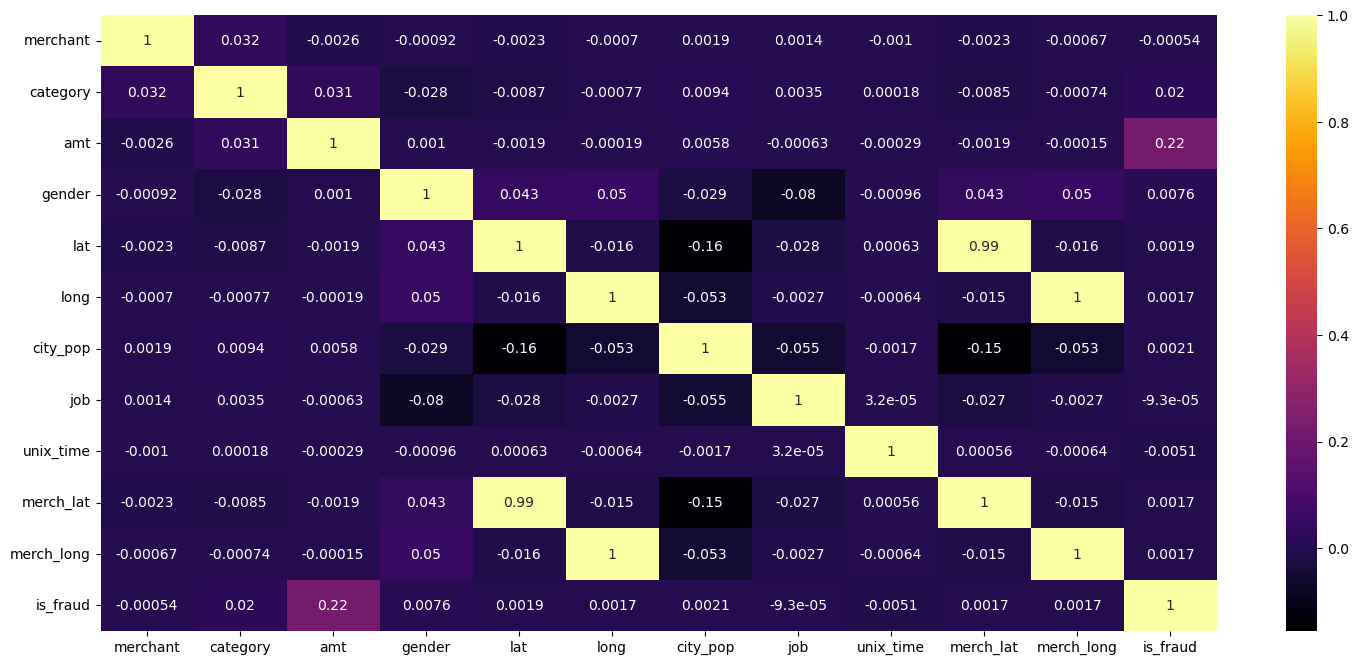

In [28]:
##Correlation between the data
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot = True,cmap = 'inferno' )

### Split the data


In [29]:
X_train = df.drop(columns = ['is_fraud'])
y_train = df['is_fraud']

In [31]:
X_train.shape

(1296675, 11)

In [32]:
y_train.shape

(1296675,)

### Model Building

In [33]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [34]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
model.score(X_train,y_train)

1.0

## Test the Model

In [36]:
test_df = pd.read_csv('fraudTest.csv')

In [37]:
test_df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job         dob  \
0  33.9659  -80.9355    333497     Mechanical engineer  1968-03-19   
1  40.3207 -110.4360       302  Sales professional, IT  1990-01-17   
2  40.6729  -73.5365     34496       Librarian, public  1970-10-21   
3  28.5697  -80.8191     54767            Set designer  1987-07-25   
4  44.2529  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [38]:
test_df.shape

(555719, 23)

In [39]:
test_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [40]:
test_df.drop(columns = ['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace =True)

In [41]:
test_df.head()

merchant        category    amt gender  \
0                 fraud_Kirlin and Sons   personal_care   2.86      M   
1                  fraud_Sporer-Keebler   personal_care  29.84      F   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28      F   
3                     fraud_Haley Group        misc_pos  60.05      M   
4                 fraud_Johnston-Casper          travel   3.19      M   

       lat      long  city_pop                     job   unix_time  merch_lat  \
0  33.9659  -80.9355    333497     Mechanical engineer  1371816865  33.986391   
1  40.3207 -110.4360       302  Sales professional, IT  1371816873  39.450498   
2  40.6729  -73.5365     34496       Librarian, public  1371816893  40.495810   
3  28.5697  -80.8191     54767            Set designer  1371816915  28.812398   
4  44.2529  -85.0170      1126      Furniture designer  1371816917  44.959148   

   merch_long  is_fraud  
0  -81.200714         0  
1 -109.960431         0  
2  -74.196111         0  
3  -80.883061         0  
4  -85.884734         0

In [42]:
test_df.shape

(555719, 12)

In [49]:
test_df.columns

Index(['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop',
       'job', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [50]:
for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_df[col] = le.fit_transform(test_df[col])
        
        
    

In [51]:
test_df.head()

merchant  category    amt  gender      lat      long  city_pop  job  \
0       319        10   2.86       1  33.9659  -80.9355    333497  275   
1       591        10  29.84       0  40.3207 -110.4360       302  392   
2       611         5  41.28       0  40.6729  -73.5365     34496  259   
3       222         9  60.05       1  28.5697  -80.8191     54767  407   
4       292        13   3.19       1  44.2529  -85.0170      1126  196   

    unix_time  merch_lat  merch_long  is_fraud  
0  1371816865  33.986391  -81.200714         0  
1  1371816873  39.450498 -109.960431         0  
2  1371816893  40.495810  -74.196111         0  
3  1371816915  28.812398  -80.883061         0  
4  1371816917  44.959148  -85.884734         0

In [57]:
X_test = test_df.drop(columns = ['is_fraud'])

In [58]:
y_test = test_df['is_fraud']

In [59]:
X_test.shape

(555719, 11)

In [60]:
y_test.shape

(555719,)

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
model = DecisionTreeClassifier()

In [63]:
model.fit(X_test,y_test)

DecisionTreeClassifier()

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score1 = accuracy_score(test_df['is_fraud'],y_test)

In [69]:
accuracy_score1

1.0